In [45]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('D:/pythonproject/Data_training_and_val_set_CNvsAD.csv')

In [47]:
# check the dataset

df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [48]:
# check the shape of the dataset

no_samples = df.shape[0]
no_cols = df.shape[1]

print("Number of samples = ", no_samples)
print("Number of features = ", no_cols)

Number of samples =  373
Number of features =  15


In [49]:
# check the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


EDA

In [50]:
# obtain the most correlated features from the dataset

cols = [col for col in df.columns[1:-1]] # exclude the individual identifier and diagnostic status from the columns
corr_feat = df[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values(ascending=False) # unstack the dataframe and sort values in descending order
corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
corr_feat.head(10)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Visit     Visit       1.000000
          MR Delay    0.920009
nWBV      MMSE        0.341912
eTIV      EDUC        0.257015
Age       MR Delay    0.205357
EDUC      MMSE        0.194884
Visit     Age         0.183213
MR Delay  eTIV        0.119624
eTIV      Visit       0.117428
nWBV      SES         0.090095
dtype: float64

KeyError: 'BRAIN'

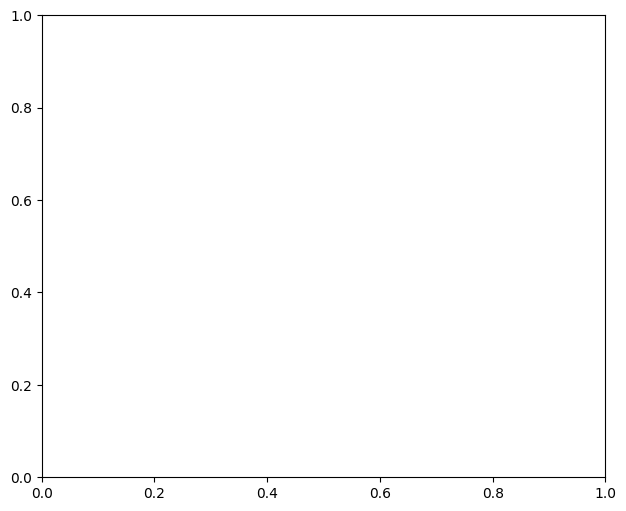

In [51]:
# set figure for the plots
plt.figure(figsize=[16, 6])

plt.subplot(1,2,1) # first plot... BRAIN vs EICV
sns.regplot(data = df, x = 'BRAIN', y = 'EICV',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('BRAIN vs EICV')

plt.subplot(1,2,2) # second plot... RMIDTEMP vs RINFLATVEN
sns.regplot(data = df, x = 'RMIDTEMP', y = 'RINFLATVEN',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('RMIDTEMP vs RINFLATVEN')

In [ ]:
# check the number of subjects in the two groups

df['DXCURREN'].value_counts()

In [ ]:
# divide the data into two... for each group of the subjects

demented = df[df.DXCURREN == 1]
normal = df[df.DXCURREN == 0]

In [ ]:
normal.describe()

In [ ]:
# obtain the mean of each feature in both group

demented_mean = demented[cols].describe().loc['mean']
demented_mean

In [ ]:
normal_mean = normal[cols].describe().loc['mean']
normal_mean

In [ ]:
# perform two sample T-test to determine features that are significantly different between the two groups
 
# Import the library
import scipy.stats as stats

a = df[df["DXCURREN"]==0][cols]
b = df[df["DXCURREN"]==1][cols]

pvalue = pd.DataFrame(stats.ttest_ind(a=a, b=b)).T[1]
pvalue

In [ ]:
# create a dataframe of the mean differences of the features for the two groups and the p-values

mean_diff = pd.DataFrame()
mean_diff["features"] = cols
mean_diff["demented"] = list(demented_mean)
mean_diff["normal"] = list(normal_mean)
mean_diff["mean difference"] = mean_diff["demented"] - mean_diff["normal"]
mean_diff["p-values"] = list(pvalue)
mean_diff = mean_diff.sort_values("p-values", ascending=True) #sort the p-values from the lowest to highest
mean_diff

In [ ]:
# obtain the significant features... these are features with p-values less than 0.05

sig_features = mean_diff[mean_diff["p-values"] <= 0.05]["features"]
sig_features

In [ ]:
#dropping irrelevant feature
df.drop(['RID'], axis=1, inplace = True)

In [ ]:
input_cols = [col for col in df.columns[:-1]] # select the input columns

X = df[input_cols] # input data
y = df['DXCURREN'] # target

Train-Test Split

In [ ]:
# splitting dataset into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1502)

In [ ]:
# check the training and validation data shape

print(X_train.shape)
print(X_val.shape)

Feature Scaling

In [ ]:
#import Standard Scaler library for feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # create an instance of the scaler
train = sc.fit_transform(X_train) # fit the scaler on the training set
train_input = pd.DataFrame(train, columns=input_cols) # convert the scaled data array into dataframe


val = sc.transform(X_val) # transform the scaler on the validation set
val_input = pd.DataFrame(val, columns=input_cols)

train_input.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)  

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

Training(Random Forest)

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred6)
print(Accuracy)

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already trained and evaluated your model and obtained the predicted labels (y_pred6) and true labels (y_test)

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(y_test, y_pred6)
recall = metrics.recall_score(y_test, y_pred6)
f1_score = metrics.f1_score(y_test, y_pred6)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Calculate the probability scores for the positive class
y_scores = model6.predict_proba(x_test)[:, 1]

# Calculate the Area Under the ROC Curve (AUC-ROC)
auc_roc = metrics.roc_auc_score(y_test, y_scores)

print("AUC-ROC:", auc_roc)


In [ ]:
model6

In [ ]:
import numpy as np
print(np.__version__)

In [ ]:
df.head()

In [ ]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

# shap Local Interpetability

In [ ]:
model6

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20,random_state = 1502)

model.fit(x_train,y_train)

In [ ]:
import shap
explainer = shap.KernelExplainer(model.predict,x_test)

In [ ]:
# Convert x_test array to DataFrame with feature names
x_test_df = pd.DataFrame(x_test, columns=x_train.columns)

# Get predictions
y_pred = model.predict(x_test)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_test_df)

# Summarize the effects of all features
shap.summary_plot(shap_values, x_test_df)

# Calculate and print mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
x_test.head()

In [ ]:
#local interpretability
instance = x_test.loc[[105]]
shap_instance = explainer.shap_values(instance)
shap.initjs()
shap.force_plot(explainer.expected_value,shap_instance,instance)

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already split your data into x_train, x_test, y_train, y_test

# Train the random forest model
model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)

# Convert x_test array to DataFrame with feature names
x_test_df = pd.DataFrame(x_test, columns=x_train.columns)

# Get predictions
y_pred6 = model6.predict(x_test)

# Compute SHAP values
explainer = shap.KernelExplainer(model6.predict, x_train)
shap_values = explainer.shap_values(x_test_df)

# Summarize the effects of all features
shap.summary_plot(shap_values, x_test_df)

# Print classification report
print(classification_report(y_test, y_pred6))
